In [2]:
pip install pandas scikit-learn matplotlib seaborn plotly


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import plotly.express as px


In [4]:
# Load the video game sales dataset

data = pd.read_csv('vgsales.csv')

# Display the first few rows of the dataset
print(data.head())


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [5]:
# Get a summary of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Check basic statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
               Rank          Yea

In [6]:
# Drop rows with missing values
data.dropna(inplace=True)

# Convert categorical variables to numeric using One-Hot Encoding
data = pd.get_dummies(data, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

# Drop columns that won't contribute to the prediction
data = data.drop(['Name'], axis=1)

# Split data into features and target (Global Sales is the target)
X = data.drop('Global_Sales', axis=1)
y = data['Global_Sales']


In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)


In [9]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - R² Score: {r2_rf}")


Random Forest - Mean Absolute Error: 0.01739165388155906
Random Forest - R² Score: 0.8372709073774135


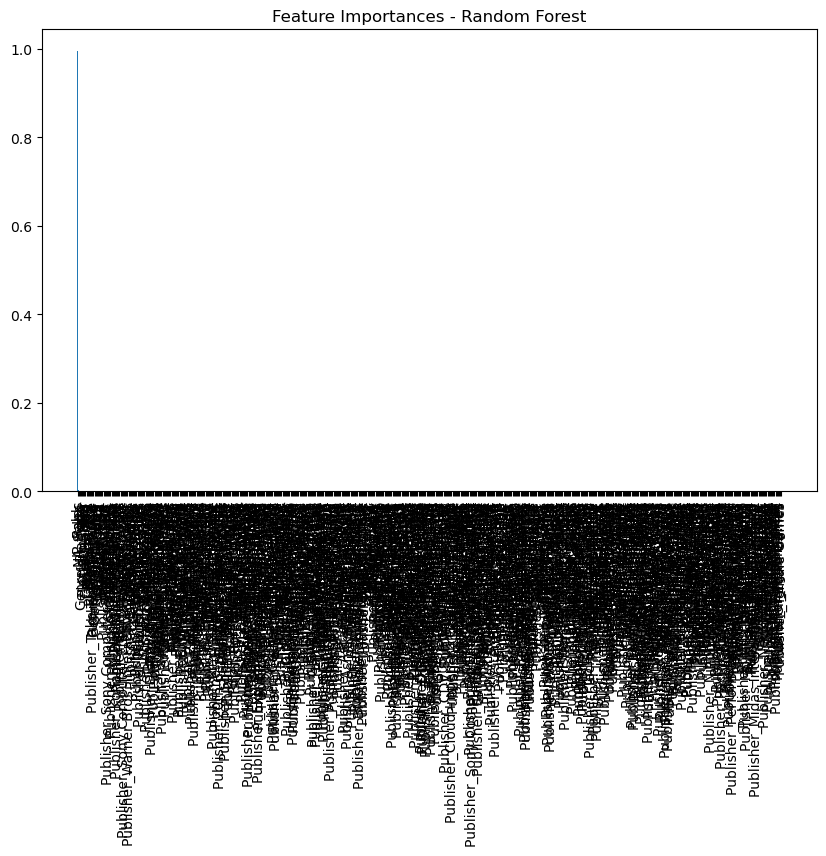

In [10]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()


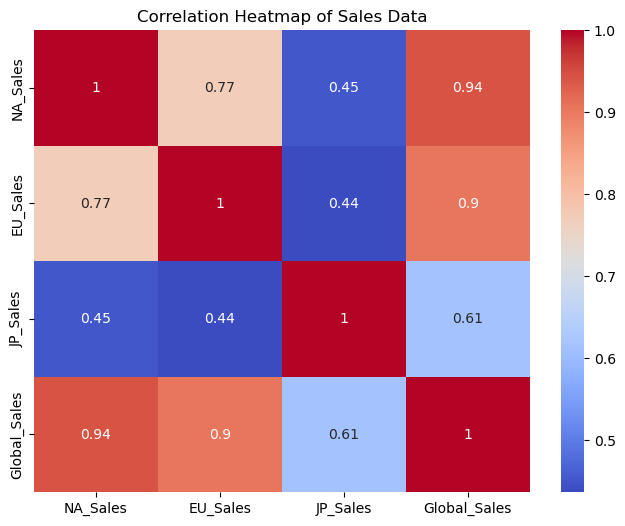

In [11]:
# Correlation matrix
corr = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Sales Data')
plt.show()


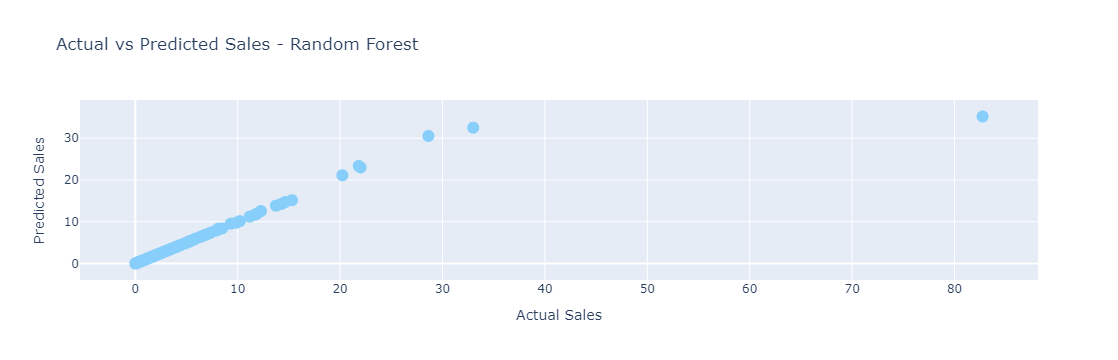

In [18]:
# Interactive scatter plot using plotly
fig = px.scatter(x=y_test, y=y_pred_rf, labels={'x':'Actual Sales', 'y':'Predicted Sales'},
                 title="Actual vs Predicted Sales - Random Forest")
fig.update_traces(marker=dict(size=12, color='LightSkyBlue'), selector=dict(mode='markers'))
fig.show()


In [13]:
# Load the video game sales dataset
import joblib
data = pd.read_csv('vgsales.csv')

# Display the first few rows of the dataset
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
# Drop rows with missing values
data.dropna(inplace=True)

# Convert categorical variables to numeric using One-Hot Encoding
data = pd.get_dummies(data, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

# Drop columns that won't contribute to the prediction
data = data.drop(['Name'], axis=1)

# Split data into features and target (Global Sales is the target)
X = data.drop('Global_Sales', axis=1)
y = data['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, 'rf_model.pkl')


['rf_model.pkl']

In [16]:
def predict_sales(platform, genre, year, na_sales, eu_sales, jp_sales):
    # Prepare the input data in the same way as training data
    input_data = pd.DataFrame({
        'Platform': [platform],
        'Genre': [genre],
        'Year': [year],
        'NA_Sales': [na_sales],
        'EU_Sales': [eu_sales],
        'JP_Sales': [jp_sales],
    })
    
    # Convert categorical variables to numeric using One-Hot Encoding
    input_data = pd.get_dummies(input_data, columns=['Platform', 'Genre'], drop_first=True)
    
    # Align with model's training features
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    
    # Make prediction
    prediction = rf_model.predict(input_data)
    return prediction[0]


In [17]:
# Get user input for predictions
platform = input("Enter the platform (e.g., PS4, X360): ")
genre = input("Enter the genre (e.g., Action, Adventure): ")
year = int(input("Enter the release year (e.g., 2008): "))
na_sales = float(input("Enter North America sales (in millions): "))
eu_sales = float(input("Enter Europe sales (in millions): "))
jp_sales = float(input("Enter Japan sales (in millions): "))

# Call the prediction function
predicted_sales = predict_sales(platform, genre, year, na_sales, eu_sales, jp_sales)

# Output the predicted sales
print(f"Predicted Global Sales: {predicted_sales:.2f} million")


KeyboardInterrupt: Interrupted by user